       U      I        P     T      u(p)  I w mA     Uc   Ic      Pc    Tc  \
0   1.00  125.0  0.12500  82.0  0.057740    20.0   8.90  5.5  48.950  43.8   
1   0.88  110.0  0.09680  75.0  0.050811    40.0   8.97  5.5  49.335  33.0   
2   0.80  100.0  0.08000  72.0  0.046192    80.0   8.98  5.5  49.390  31.5   
3   0.77   98.0  0.07546  70.0  0.044460   120.0   9.00  5.5  49.500  30.0   
4   0.70   95.0  0.06650  66.0  0.040418   180.0   9.00  5.5  49.500  28.0   
5   0.67   92.0  0.06164  65.0  0.038686   240.0   9.00  5.5  49.500  26.0   
6   0.65   90.0  0.05850  64.0  0.037531   300.0   9.00  5.5  49.500  24.5   
7   0.62   90.0  0.05580  62.0  0.035799   360.0   9.00  5.5  49.500  23.0   
8   0.58   86.0  0.04988  60.0  0.033490   420.0   9.20  5.5  50.600  21.5   
9   0.53   83.0  0.04399  58.0  0.030603   480.0   9.20  5.5  50.600  20.0   
10  0.50   80.0  0.04000  56.0  0.028871   540.0   9.20  5.5  50.600  18.5   
11  0.46   79.0  0.03634  54.0  0.026562   600.0   9.20  5.5  50

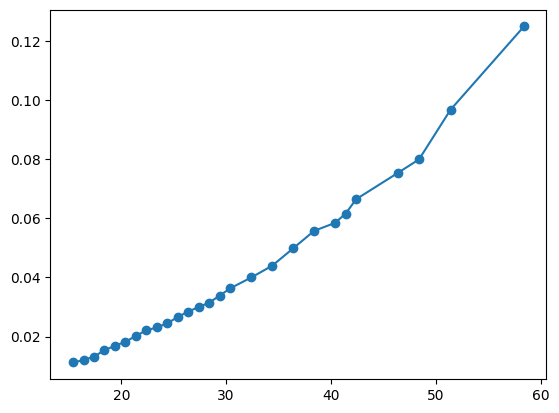

<Figure size 640x480 with 0 Axes>

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
import math as m
data = pd.read_excel('Lab133.xlsx')
T_w = 23.6
V_w = 0.000112 
uvw = 1e-6
q = V_w*997*4200*(max(data.loc[:26,'T']) - min(data.loc[:26,'T']))
q_pradu = integrate.trapz(y = data.loc[:26,"P"], x= range(120,(len(data.loc[:26,"P"])+1)*120,120))
print(data)
print(q_pradu,q)
print(q_pradu/q*100)


#niepewność tutaj to XD


plt.plot(data.loc[:,"T"] - T_w,data.loc[:,'P'],marker = 'o')
plt.figure()
#plt.plot(data.loc[:,"Czas"]/2,data.loc[:,"T"] - T_w,marker = 'o')
plt.show() 

Generator termoelektryczny

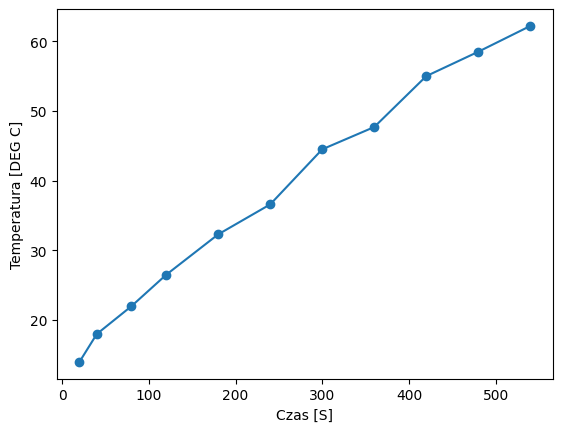

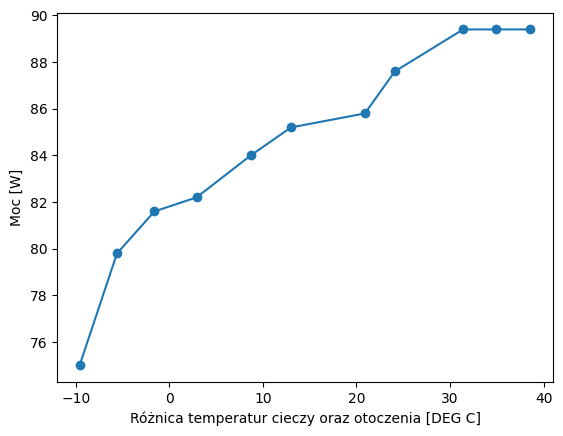

In [4]:
delta_t = data.loc[:,"Tg"] - T_w
plt.plot(data.loc[:,"Czas"],data.loc[:,"Tg"],marker = 'o')
plt.xlabel("Czas [S]")
plt.ylabel("Temperatura [DEG C]")
plt.figure()
plt.plot(delta_t,data.loc[:,"Pg"],marker = 'o')
plt.xlabel("Różnica temperatur cieczy oraz otoczenia [DEG C]")
plt.ylabel("Moc [W]")
plt.show()

In [6]:
from scipy import integrate
q_pradu = integrate.trapz(y = data.loc[:10,"Pg"], x= data.loc[:10,'Czasg'])
q = V_w*997*4200*(max(data.loc[:10,'Tg']) - min(data.loc[:10,'Tg']))
print(q/q_pradu*100)
uq = m.sqrt((V_w*997*4200*0.2)**2 + (997*4200*((max(data.loc[:10,'Tg']) - min(data.loc[:10,'Tg']))* uvw)**2))

####   błąd na qpradu
dpdt = np.diff(data.loc[:10,"Pg"])/ np.diff(data.loc[:10,'Czasg'])
d2pdt2 = np.diff(dpdt)/np.diff(data.loc[:10,'Czasg'])[:-1]
fbismax = max(d2pdt2)
#print(fbismax)
intervalcubed = (data.loc[10,'Czasg'] - data.loc[0,'Czasg'])**3
trapzerror = fbismax*intervalcubed/(12*(len( data.loc[:10,'Czasg'])-1)**2)
#print(trapzerror/q_pradu)
##################


niepewnosc = m.sqrt((uq*100/q_pradu)**2 + (q*100*trapzerror/q_pradu**2)**2)
print(niepewnosc)

62.708777629826905
0.27238566164472516


B. Chłodziarka Peltiera

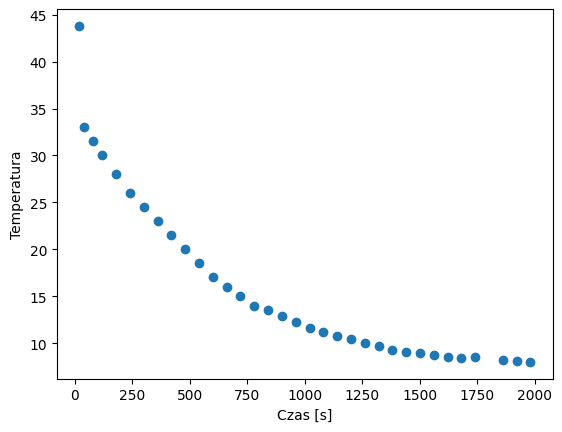

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(data.loc[:,"Czas"],data.loc[:,"Tc"])
plt.xlabel("Czas [s]")
plt.ylabel("Temperatura")
plt.figure()
plt.show()

In [7]:
from scipy import integrate
q_pradu = integrate.trapz(y = data.loc[:33,"Pc"], x= data.loc[:33,'Czas'])
q = V_w*997*4200*(max(data.loc[:33,'Tc']) - min(data.loc[:33,'Tc']))
print(q/q_pradu*100)
uq = m.sqrt((V_w*997*4200*0.2)**2 + (997*4200*((max(data.loc[:33,'Tc']) - min(data.loc[:33,'Tc']))* uvw)**2))

####   błąd na qpradu
dpdt = np.diff(data.loc[:33,"Pc"])/ np.diff(data.loc[:33,'Czas'])
d2pdt2 = np.diff(dpdt)/np.diff(data.loc[:33,'Czas'])[:-1]
fbismax = max(d2pdt2)
#print(fbismax)
intervalcubed = (data.loc[33,'Czas'] - data.loc[0,'Czas'])**3
trapzerror = fbismax*intervalcubed/(12*(len( data.loc[:33,'Czas'])-1)**2)
#print(trapzerror/q_pradu)
##################
niepewnosc = m.sqrt((uq*100/q_pradu)**2 + (q*100*trapzerror/q_pradu**2)**2)
print(niepewnosc)

16.711106439775097
0.15435504729535737
